In [15]:
# from sklearn.model_selection import train_test_split

# # Example data
# X = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Features
# y = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]  # Labels

# # Split the data with random_state=42 (same split every time)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print("Train Data:", X_train)
# print("Test Data:", X_test)


Train Data: [6, 1, 8, 3, 10, 5, 4, 7]
Test Data: [9, 2]


In [1]:
!pip install xgboost


In [2]:
!pip show imbalanced-learn
!pip show scikit-learn


Name: imbalanced-learn
Version: 0.12.4
Summary: Toolbox for imbalanced dataset in machine learning.
Home-page: https://github.com/scikit-learn-contrib/imbalanced-learn
Author: 
Author-email: 
License: MIT
Location: C:\Users\PC\anaconda3\Lib\site-packages
Requires: joblib, numpy, scikit-learn, scipy, threadpoolctl
Required-by: 
Name: scikit-learn
Version: 1.6.0
Summary: A set of python modules for machine learning and data mining
Home-page: 
Author: 
Author-email: 
License: BSD 3-Clause License

 Copyright (c) 2007-2024 The scikit-learn developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are met:

 * Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

 * Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the docum

In [3]:
!pip install --upgrade scikit-learn imbalanced-learn


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [5]:
Data=pd.read_csv("MD_data.csv")

In [6]:
Data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,24.56,Yes,No,No,20,15.0,No,Female,50-54,Hispanic,No,Yes,Good,6,No,No,No
1,No,30.23,No,No,No,0,0.0,No,Female,75-79,White,No,Yes,Excellent,7,No,No,No
2,No,29.12,Yes,No,No,0,0.0,No,Female,80 or older,White,No,Yes,Excellent,7,Yes,No,No
3,Yes,30.23,No,No,No,0,0.0,No,Female,80 or older,White,No,Yes,Very good,8,No,No,No
4,No,20.81,Yes,No,Yes,0,0.0,No,Male,65-69,White,No,Yes,Fair,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59063,Yes,21.93,Yes,No,No,20,0.0,No,Female,70-74,White,Yes,Yes,Fair,4,Yes,No,Yes
59064,No,24.68,Yes,No,No,0,0.0,Yes,Male,80 or older,White,No,Yes,Very good,6,No,No,Yes
59065,Yes,20.38,No,No,No,5,4.0,No,Female,65-69,White,No,Yes,Good,7,No,No,No
59066,No,25.86,Yes,No,No,30,0.0,Yes,Male,65-69,White,No,No,Good,7,No,No,Yes


# Inspect the Dataset

In [7]:
Data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,24.56,Yes,No,No,20,15.0,No,Female,50-54,Hispanic,No,Yes,Good,6,No,No,No
1,No,30.23,No,No,No,0,0.0,No,Female,75-79,White,No,Yes,Excellent,7,No,No,No
2,No,29.12,Yes,No,No,0,0.0,No,Female,80 or older,White,No,Yes,Excellent,7,Yes,No,No
3,Yes,30.23,No,No,No,0,0.0,No,Female,80 or older,White,No,Yes,Very good,8,No,No,No
4,No,20.81,Yes,No,Yes,0,0.0,No,Male,65-69,White,No,Yes,Fair,8,No,No,No


In [8]:

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59068 entries, 0 to 59067
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      59068 non-null  object 
 1   BMI               59068 non-null  float64
 2   Smoking           59068 non-null  object 
 3   AlcoholDrinking   59068 non-null  object 
 4   Stroke            59068 non-null  object 
 5   PhysicalHealth    59068 non-null  int64  
 6   MentalHealth      59040 non-null  float64
 7   DiffWalking       59068 non-null  object 
 8   Sex               59068 non-null  object 
 9   AgeCategory       59068 non-null  object 
 10  Race              59068 non-null  object 
 11  Diabetic          59068 non-null  object 
 12  PhysicalActivity  59068 non-null  object 
 13  GenHealth         59059 non-null  object 
 14  SleepTime         59068 non-null  int64  
 15  Asthma            59068 non-null  object 
 16  KidneyDisease     59068 non-null  object

In [9]:

Data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,59068.000000,59068.000000,59040.000000,59068.000000
mean,28.571367,5.281658,4.221528,7.137282
std,6.415493,9.842607,8.439989,1.601112
min,12.210000,0.000000,0.000000,1.000000
25%,24.250000,0.000000,0.000000,6.000000
50%,27.460000,0.000000,0.000000,7.000000
75%,31.750000,5.000000,4.000000,8.000000
max,83.330000,30.000000,30.000000,24.000000


In [10]:

print(Data.isnull().sum())

HeartDisease         0
BMI                  0
Smoking              0
AlcoholDrinking      0
Stroke               0
PhysicalHealth       0
MentalHealth        28
DiffWalking          0
Sex                  0
AgeCategory          0
Race                 0
Diabetic             0
PhysicalActivity     0
GenHealth            9
SleepTime            0
Asthma               0
KidneyDisease        0
SkinCancer           0
dtype: int64


# Data Visulization

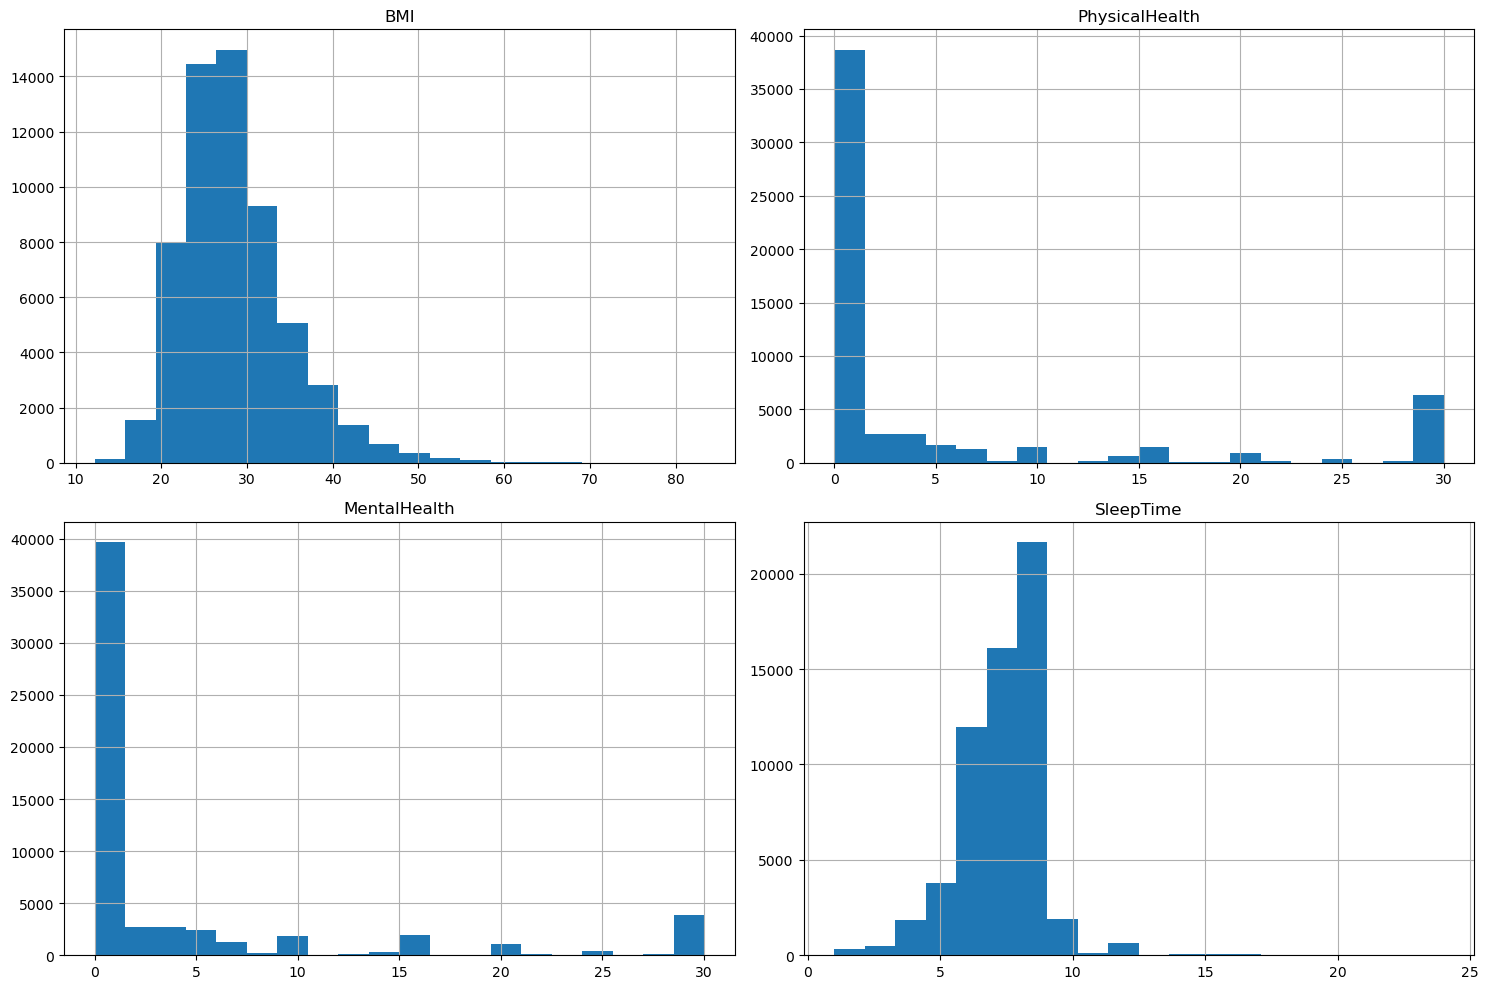

In [11]:
Data.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [12]:
#In a correlation matrix, negative values indicate an inverse relationship between two variables. 
#This means that as one variable increases, the other tends to decrease.

C:\Users\PC\AppData\Local\Temp\ipykernel_17388\4178020250.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Data.corr()


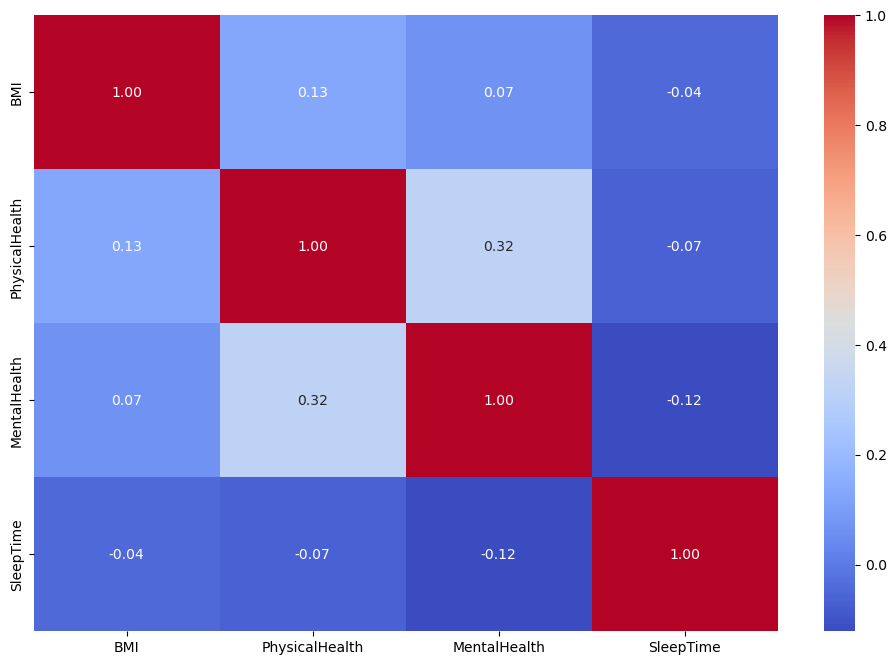

In [13]:
correlation_matrix = Data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


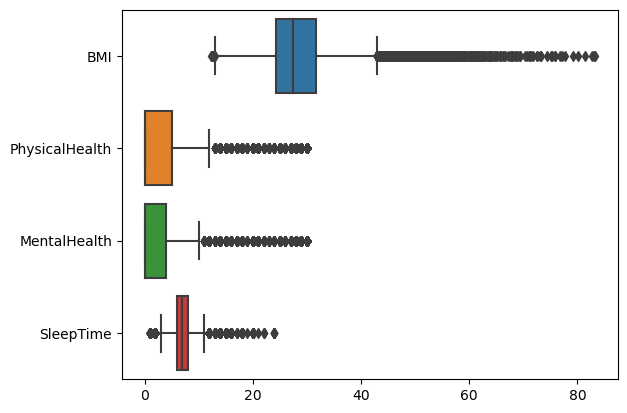

In [14]:

sns.boxplot(data=Data, orient="h")
plt.show()

# Handle Missing Values


In [15]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from scipy import stats

In [16]:
original_columns = Data.columns

# Handle missing values using SimpleImputer (strategy='most_frequent')
imputer = SimpleImputer(strategy='most_frequent')
data_imputed = imputer.fit_transform(Data)


In [17]:
# Convert back to DataFrame with original column names
data = pd.DataFrame(data_imputed, columns=original_columns)


In [18]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,24.56,Yes,No,No,20,15.0,No,Female,50-54,Hispanic,No,Yes,Good,6,No,No,No
1,No,30.23,No,No,No,0,0.0,No,Female,75-79,White,No,Yes,Excellent,7,No,No,No
2,No,29.12,Yes,No,No,0,0.0,No,Female,80 or older,White,No,Yes,Excellent,7,Yes,No,No
3,Yes,30.23,No,No,No,0,0.0,No,Female,80 or older,White,No,Yes,Very good,8,No,No,No
4,No,20.81,Yes,No,Yes,0,0.0,No,Male,65-69,White,No,Yes,Fair,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59063,Yes,21.93,Yes,No,No,20,0.0,No,Female,70-74,White,Yes,Yes,Fair,4,Yes,No,Yes
59064,No,24.68,Yes,No,No,0,0.0,Yes,Male,80 or older,White,No,Yes,Very good,6,No,No,Yes
59065,Yes,20.38,No,No,No,5,4.0,No,Female,65-69,White,No,Yes,Good,7,No,No,No
59066,No,25.86,Yes,No,No,30,0.0,Yes,Male,65-69,White,No,No,Good,7,No,No,Yes


In [19]:
print(data.isnull().sum())

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


# Duplicates

In [20]:
# Check for duplicate rows
duplicate_rows = data[data.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

# Drop all duplicate rows, keeping the first occurrence
data= data.drop_duplicates(keep='first')

# # If you want to drop the duplicate rows and not keep any occurrence, you can do:
# data = data.drop_duplicates(keep=False)

# Show the cleaned dataset
data


Number of duplicate rows: 381


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,24.56,Yes,No,No,20,15.0,No,Female,50-54,Hispanic,No,Yes,Good,6,No,No,No
1,No,30.23,No,No,No,0,0.0,No,Female,75-79,White,No,Yes,Excellent,7,No,No,No
2,No,29.12,Yes,No,No,0,0.0,No,Female,80 or older,White,No,Yes,Excellent,7,Yes,No,No
3,Yes,30.23,No,No,No,0,0.0,No,Female,80 or older,White,No,Yes,Very good,8,No,No,No
4,No,20.81,Yes,No,Yes,0,0.0,No,Male,65-69,White,No,Yes,Fair,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59063,Yes,21.93,Yes,No,No,20,0.0,No,Female,70-74,White,Yes,Yes,Fair,4,Yes,No,Yes
59064,No,24.68,Yes,No,No,0,0.0,Yes,Male,80 or older,White,No,Yes,Very good,6,No,No,Yes
59065,Yes,20.38,No,No,No,5,4.0,No,Female,65-69,White,No,Yes,Good,7,No,No,No
59066,No,25.86,Yes,No,No,30,0.0,Yes,Male,65-69,White,No,No,Good,7,No,No,Yes


In [21]:

numeric_columns = data.select_dtypes(include=[np.number]).columns

# Identify binary columns and low-cardinality columns
binary_or_low_cardinality_columns = [col for col in numeric_columns if data[col].nunique() <= 10]

# Identify truly continuous columns
continuous_columns = [col for col in numeric_columns if col not in binary_or_low_cardinality_columns]

# Apply IQR-based outlier handling only to continuous columns
for col in continuous_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    data[col] = data[col].clip(lower=lower_limit, upper=upper_limit)

# Feature Engenering 

In [22]:

# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Assuming 'data' is your original DataFrame

# Step 1: Feature Engineering
# Creating a new 'HealthIndex' feature by combining 'PhysicalHealth' and 'MentalHealth'
data['HealthIndex'] = data['PhysicalHealth'] + data['MentalHealth']

# Step 2: Encoding Categorical Variables

# Label Encoding: For ordinal features like 'AgeCategory' if applicable
label_encoder = LabelEncoder()
data['AgeCategory_encoded'] = label_encoder.fit_transform(data['AgeCategory'])

# One-Hot Encoding: For nominal features like 'Sex', 'Race', etc.
data = pd.get_dummies(data, columns=['Sex', 'Race', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer'])

# Now, your DataFrame has the new 'HealthIndex' feature and the categorical variables encoded.

data


C:\Users\PC\AppData\Local\Temp\ipykernel_17388\1477139531.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['HealthIndex'] = data['PhysicalHealth'] + data['MentalHealth']
C:\Users\PC\AppData\Local\Temp\ipykernel_17388\1477139531.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['AgeCategory_encoded'] = label_encoder.fit_transform(data['AgeCategory'])


,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Diabetic,GenHealth,SleepTime,HealthIndex,AgeCategory_encoded,...,DiffWalking_No,DiffWalking_Yes,PhysicalActivity_No,PhysicalActivity_Yes,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,No,24.56,20,15.0,50-54,No,Good,6,35.0,6,...,1,0,0,1,1,0,1,0,1,0
1,No,30.23,0,0.0,75-79,No,Excellent,7,0.0,11,...,1,0,0,1,1,0,1,0,1,0
2,No,29.12,0,0.0,80 or older,No,Excellent,7,0.0,12,...,1,0,0,1,0,1,1,0,1,0
3,Yes,30.23,0,0.0,80 or older,No,Very good,8,0.0,12,...,1,0,0,1,1,0,1,0,1,0
4,No,20.81,0,0.0,65-69,No,Fair,8,0.0,9,...,1,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59063,Yes,21.93,20,0.0,70-74,Yes,Fair,4,20.0,10,...,1,0,0,1,0,1,1,0,0,1
59064,No,24.68,0,0.0,80 or older,No,Very good,6,0.0,12,...,0,1,0,1,1,0,1,0,0,1
59065,Yes,20.38,5,4.0,65-69,No,Good,7,9.0,9,...,1,0,0,1,1,0,1,0,1,0
59066,No,25.86,30,0.0,65-69,No,Good,7,30.0,9,...,0,1,1,0,1,0,1,0,0,1


In [23]:
# Identify continuous columns (numeric columns excluding binary or categorical ones)
continuous_columns = [col for col in data.select_dtypes(include=[np.number]).columns if data[col].nunique() > 10]

print("Continuous Columns:", continuous_columns)


Continuous Columns: ['AgeCategory_encoded']


In [24]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to continuous columns
data[continuous_columns] = scaler.fit_transform(data[continuous_columns])

print("Data after Standardization:")
print(data[continuous_columns].head())


Data after Standardization:
   AgeCategory_encoded
0            -0.492292
1             0.973771
2             1.266984
3             1.266984
4             0.387346


In [25]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling to continuous columns
data[continuous_columns] = scaler.fit_transform(data[continuous_columns])

print("Data after Min-Max Scaling:")
print(data[continuous_columns].head())


Data after Min-Max Scaling:
   AgeCategory_encoded
0             0.500000
1             0.916667
2             1.000000
3             1.000000
4             0.750000


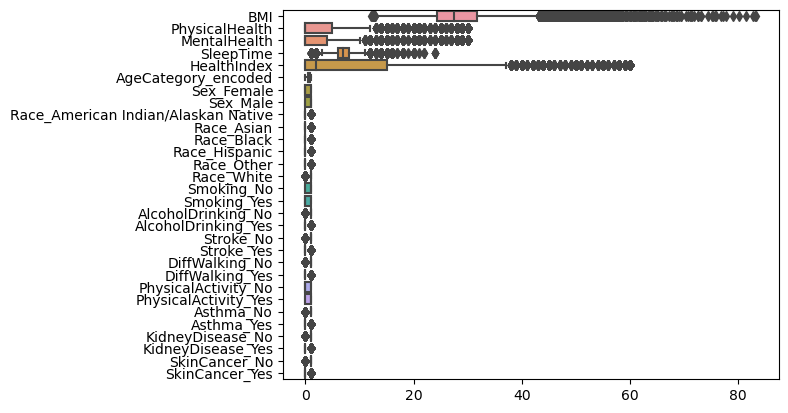

In [26]:

sns.boxplot(data=data, orient="h")
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_17388\36012964.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


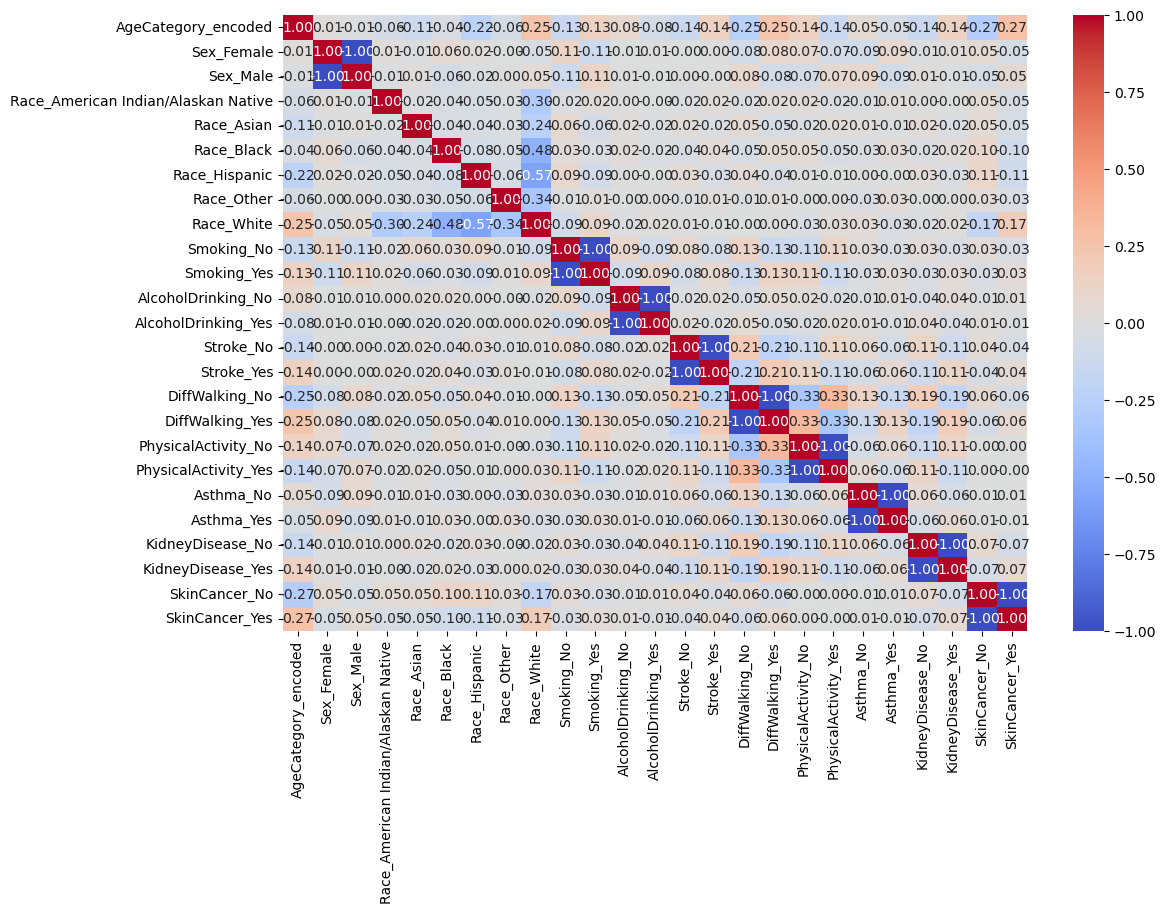

In [27]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


In [28]:
# Final Check for missing values
print("Missing values after imputation and encoding:")
print(data.isnull().sum())



Missing values after imputation and encoding:
HeartDisease                           0
BMI                                    0
PhysicalHealth                         0
MentalHealth                           0
AgeCategory                            0
Diabetic                               0
GenHealth                              0
SleepTime                              0
HealthIndex                            0
AgeCategory_encoded                    0
Sex_Female                             0
Sex_Male                               0
Race_American Indian/Alaskan Native    0
Race_Asian                             0
Race_Black                             0
Race_Hispanic                          0
Race_Other                             0
Race_White                             0
Smoking_No                             0
Smoking_Yes                            0
AlcoholDrinking_No                     0
AlcoholDrinking_Yes                    0
Stroke_No                              0
Stroke_Yes 

# Handle outliers

In [29]:
# # Handle outliers using IQR for all numeric columns in the dataset
# outlier_columns = data.select_dtypes(include=[np.number]).columns  # Selecting all numeric columns

# for col in outlier_columns:
#     Q1 = data[col].quantile(0.25)
#     Q3 = data[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_limit = Q1 - 1.5 * IQR
#     upper_limit = Q3 + 1.5 * IQR
    
#     data[col] = data[col].clip(lower=lower_limit, upper=upper_limit)

    
# data


# Numeric columns
# numeric_columns = data.select_dtypes(include=[np.number]).columns

# # Identify binary columns and low-cardinality columns
# binary_or_low_cardinality_columns = [col for col in numeric_columns if data[col].nunique() <= 10]

# # Identify truly continuous columns
# continuous_columns = [col for col in numeric_columns if col not in binary_or_low_cardinality_columns]

# # Apply IQR-based outlier handling only to continuous columns
# for col in continuous_columns:
#     Q1 = data[col].quantile(0.25)
#     Q3 = data[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_limit = Q1 - 1.5 * IQR
#     upper_limit = Q3 + 1.5 * IQR
#     data[col] = data[col].clip(lower=lower_limit, upper=upper_limit)



In [30]:
# # Importing StandardScaler
# from sklearn.preprocessing import StandardScaler

# # Step 1: Apply scaling to the continuous features
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(data[['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'Race', 'Diabetic', 'GenHealth', 'SleepTime']])

# # Step 2: Replace the scaled data back into the original dataframe
# data[['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'Race', 'Diabetic', 'GenHealth', 'SleepTime']] = scaled_data


In [31]:
# single_value_columns = [col for col in data.columns if data[col].nunique() == 1]
# data.drop(columns=single_value_columns, inplace=True)

In [32]:
for col in data.select_dtypes(include=[np.number]).columns:
    print(f"Unique values in {col}: {data[col].unique()}")


Unique values in AgeCategory_encoded: [0.5        0.91666667 1.         0.75       0.66666667 0.33333333
 0.         0.08333333 0.83333333 0.41666667 0.58333333 0.25
 0.16666667]
Unique values in Sex_Female: [1 0]
Unique values in Sex_Male: [0 1]
Unique values in Race_American Indian/Alaskan Native: [0 1]
Unique values in Race_Asian: [0 1]
Unique values in Race_Black: [0 1]
Unique values in Race_Hispanic: [1 0]
Unique values in Race_Other: [0 1]
Unique values in Race_White: [0 1]
Unique values in Smoking_No: [0 1]
Unique values in Smoking_Yes: [1 0]
Unique values in AlcoholDrinking_No: [1 0]
Unique values in AlcoholDrinking_Yes: [0 1]
Unique values in Stroke_No: [1 0]
Unique values in Stroke_Yes: [0 1]
Unique values in DiffWalking_No: [1 0]
Unique values in DiffWalking_Yes: [0 1]
Unique values in PhysicalActivity_No: [0 1]
Unique values in PhysicalActivity_Yes: [1 0]
Unique values in Asthma_No: [1 0]
Unique values in Asthma_Yes: [0 1]
Unique values in KidneyDisease_No: [1 0]
Unique val

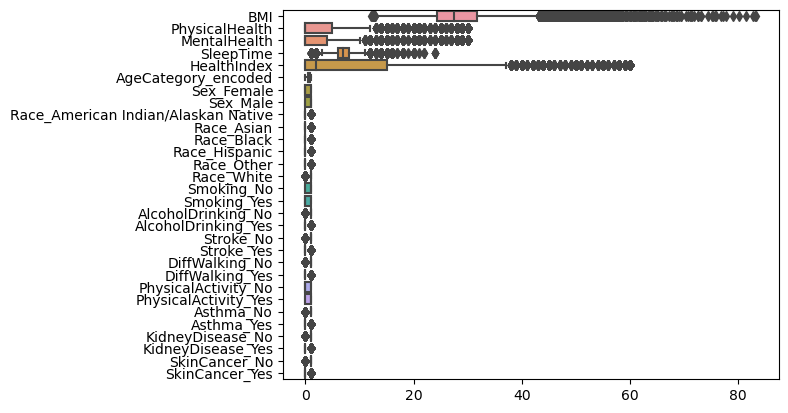

In [33]:

sns.boxplot(data=data, orient="h")
plt.show()

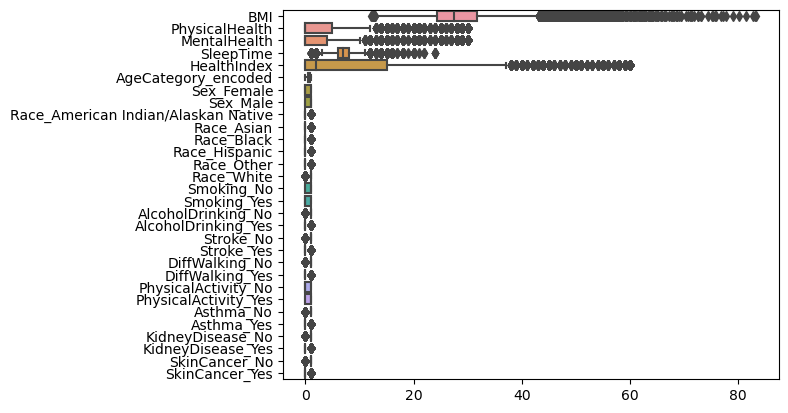

In [34]:

sns.boxplot(data=data, orient="h")
plt.show()

In [35]:
print(data.describe())

       AgeCategory_encoded    Sex_Female      Sex_Male  \
count         58687.000000  58687.000000  58687.000000   
mean              0.639913      0.479340      0.520660   
std               0.284210      0.499577      0.499577   
min               0.000000      0.000000      0.000000   
25%               0.500000      0.000000      0.000000   
50%               0.666667      0.000000      1.000000   
75%               0.833333      1.000000      1.000000   
max               1.000000      1.000000      1.000000   

       Race_American Indian/Alaskan Native    Race_Asian    Race_Black  \
count                         58687.000000  58687.000000  58687.000000   
mean                              0.026139      0.017943      0.065909   
std                               0.159549      0.132744      0.248125   
min                               0.000000      0.000000      0.000000   
25%                               0.000000      0.000000      0.000000   
50%                              

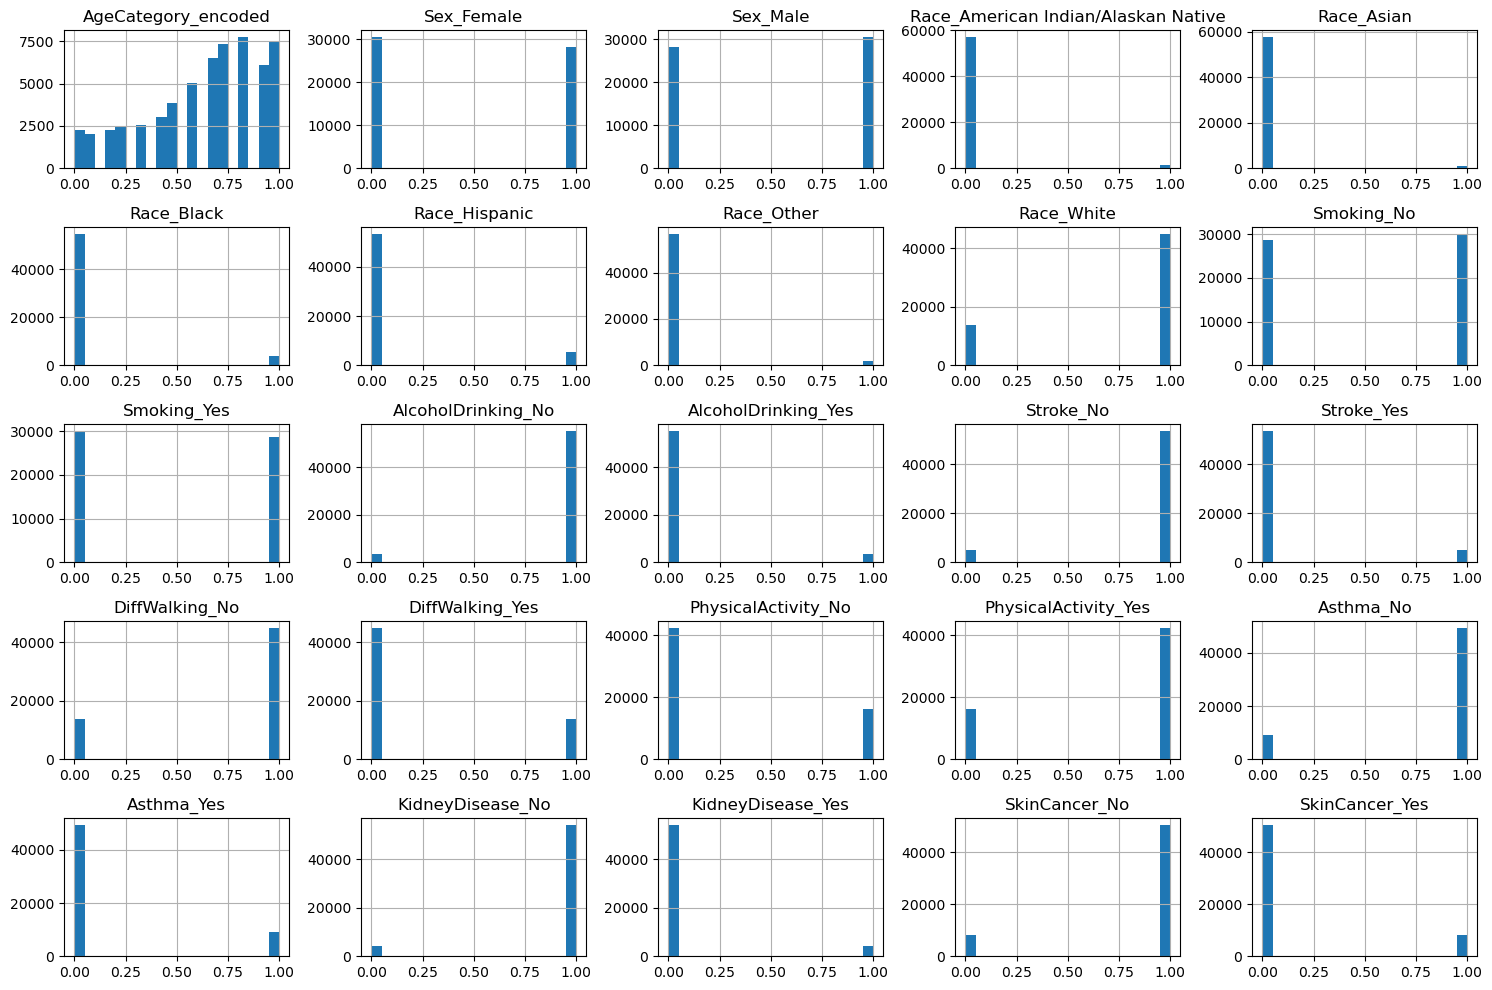

In [36]:
data.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [37]:
# Check for missing values in the dataset
data.isnull().sum()


HeartDisease                           0
BMI                                    0
PhysicalHealth                         0
MentalHealth                           0
AgeCategory                            0
Diabetic                               0
GenHealth                              0
SleepTime                              0
HealthIndex                            0
AgeCategory_encoded                    0
Sex_Female                             0
Sex_Male                               0
Race_American Indian/Alaskan Native    0
Race_Asian                             0
Race_Black                             0
Race_Hispanic                          0
Race_Other                             0
Race_White                             0
Smoking_No                             0
Smoking_Yes                            0
AlcoholDrinking_No                     0
AlcoholDrinking_Yes                    0
Stroke_No                              0
Stroke_Yes                             0
DiffWalking_No  

In [38]:
data

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Diabetic,GenHealth,SleepTime,HealthIndex,AgeCategory_encoded,...,DiffWalking_No,DiffWalking_Yes,PhysicalActivity_No,PhysicalActivity_Yes,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,No,24.56,20,15.0,50-54,No,Good,6,35.0,0.500000,...,1,0,0,1,1,0,1,0,1,0
1,No,30.23,0,0.0,75-79,No,Excellent,7,0.0,0.916667,...,1,0,0,1,1,0,1,0,1,0
2,No,29.12,0,0.0,80 or older,No,Excellent,7,0.0,1.000000,...,1,0,0,1,0,1,1,0,1,0
3,Yes,30.23,0,0.0,80 or older,No,Very good,8,0.0,1.000000,...,1,0,0,1,1,0,1,0,1,0
4,No,20.81,0,0.0,65-69,No,Fair,8,0.0,0.750000,...,1,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59063,Yes,21.93,20,0.0,70-74,Yes,Fair,4,20.0,0.833333,...,1,0,0,1,0,1,1,0,0,1
59064,No,24.68,0,0.0,80 or older,No,Very good,6,0.0,1.000000,...,0,1,0,1,1,0,1,0,0,1
59065,Yes,20.38,5,4.0,65-69,No,Good,7,9.0,0.750000,...,1,0,0,1,1,0,1,0,1,0
59066,No,25.86,30,0.0,65-69,No,Good,7,30.0,0.750000,...,0,1,1,0,1,0,1,0,0,1


C:\Users\PC\AppData\Local\Temp\ipykernel_17388\2978352088.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


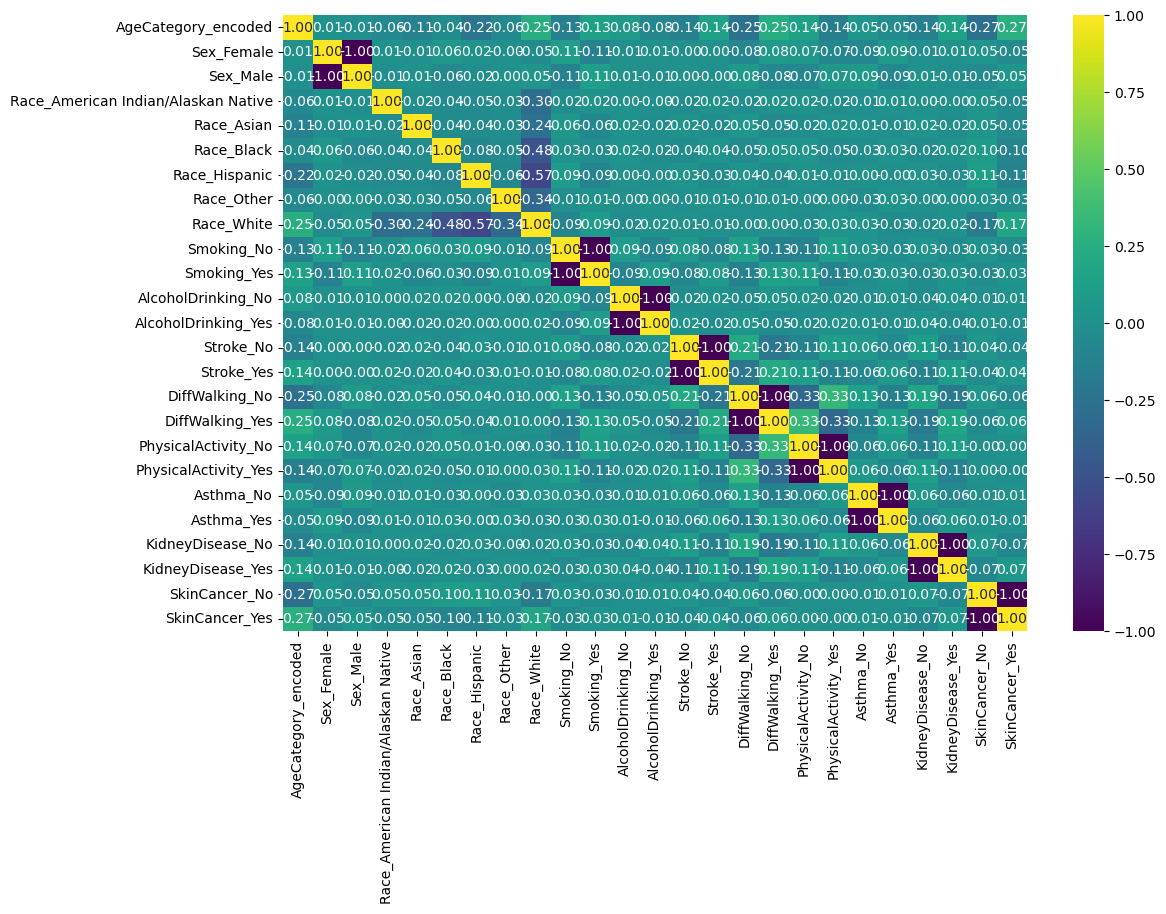

In [39]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f")
plt.show()


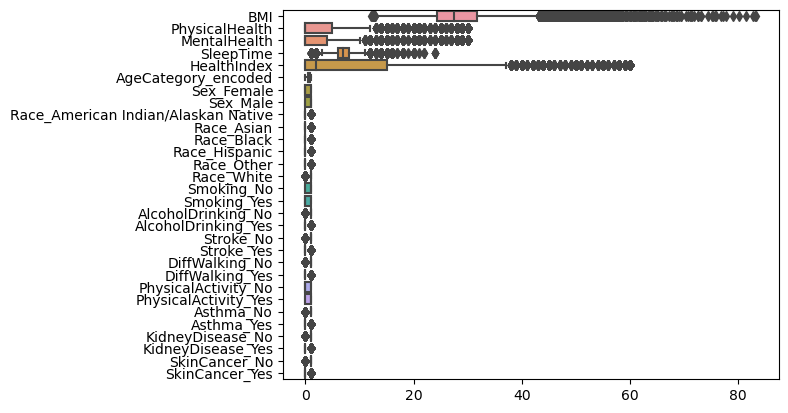

In [40]:
sns.boxplot(data=data, orient="h")
plt.show()

In [41]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from collections import Counter

X = data.drop(columns=['HeartDisease'])  
Y = data['HeartDisease']  

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Print the class distribution before sampling
print("Before Sampling:")
print("Training Set Class Distribution:", Counter(y_train))
print("Testing Set Class Distribution:", Counter(y_test))

### Apply Data Sampling on Training Data Only ###

# 1. **Oversampling with SMOTE**
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("\nAfter SMOTE Oversampling:")
print("Training Set Class Distribution:", Counter(y_train_smote))

# 2. **Undersampling with RandomUnderSampler**
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
print("\nAfter Random Undersampling:")
print("Training Set Class Distribution:", Counter(y_train_rus))

# 3. **Combination of Over- and Undersampling (SMOTETomek)**
smt = SMOTETomek(random_state=42)
X_train, y_train = smt.fit_resample(X_train, y_train)
print("\nAfter SMOTETomek Sampling:")
print("Training Set Class Distribution:", Counter(y_train))

# The balanced datasets (X_train_smote, y_train_smote, etc.) can now be used for training your model.


Before Sampling:
Training Set Class Distribution: Counter({'No': 25168, 'Yes': 21781})
Testing Set Class Distribution: Counter({'No': 6258, 'Yes': 5480})


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


ValueError: could not convert string to float: '30-34'

In [ ]:
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize and train the Logistic Regression model
start_time = time.time()
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)
end_time = time.time()

# Make predictions
y_pred = model_lr.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # 'binary' for binary classification
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Computational Efficiency
time_taken = end_time - start_time

# Print the results
print("Logistic Regression")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Computational Efficiency (Time): {time_taken:.4f} seconds\n")


In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd



# Initialize Logistic Regression
model_lr = LogisticRegression(max_iter=1000)

# Perform K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Start measuring time for cross-validation
start_time = time.time()

# Perform cross-validation and calculate the accuracy
cross_val_accuracy = cross_val_score(model_lr, X_train, y_train, cv=kf, scoring='accuracy')
mean_cv_accuracy = np.mean(cross_val_accuracy)

# End time after cross-validation
end_time = time.time()
time_taken_cv = end_time - start_time

# Now, apply GridSearchCV for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],  # L2 regularization to prevent overfitting
    'solver': ['liblinear']  # Solver suitable for smaller datasets
}

grid_search = GridSearchCV(model_lr, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # 'binary' for binary classification
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Print the results
print("K-Fold Cross-Validation Accuracy: {:.4f}".format(mean_cv_accuracy))
print("\nBest Logistic Regression Model Performance after Hyperparameter Tuning:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Computational Efficiency (Time): {time_taken_cv:.4f} seconds\n")


# naive_bayes import GaussianNB

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time
import numpy as np
import pandas as pd


# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Measure the time taken to fit and predict
start_time = time.time()

# Fit the model
nb_model.fit(X_train, y_train)

# Predict
y_pred_nb = nb_model.predict(X_test)

# Calculate the performance metrics
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_precision = precision_score(y_test, y_pred_nb)
nb_recall = recall_score(y_test, y_pred_nb)
nb_f1 = f1_score(y_test, y_pred_nb)

# Measure computational efficiency (time taken)
nb_time = time.time() - start_time

# Print the results
print("Naive Bayes (GaussianNB)")
print("Accuracy: ", nb_accuracy)
print("Precision: ", nb_precision)
print("Recall: ", nb_recall)
print("F1-score: ", nb_f1)
print("Computational Efficiency (Time): ", nb_time, "seconds")


In [ ]:
import time
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np


# Initialize Naive Bayes model
nb_model = GaussianNB()

# Perform K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_accuracy = cross_val_score(nb_model, X_train, y_train, cv=kf, scoring='accuracy')
mean_cv_accuracy = np.mean(cross_val_accuracy)

# Perform GridSearchCV for hyperparameter tuning on 'var_smoothing'
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}
grid_search = GridSearchCV(nb_model, param_grid, cv=kf, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_nb_model = grid_search.best_estimator_

# Measure the time taken to fit and predict with the best model
start_time = time.time()

# Fit the best model
best_nb_model.fit(X_train, y_train)

# Predict
y_pred_nb = best_nb_model.predict(X_test)

# Calculate performance metrics
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_precision = precision_score(y_test, y_pred_nb)
nb_recall = recall_score(y_test, y_pred_nb)
nb_f1 = f1_score(y_test, y_pred_nb)

# Measure computational efficiency (time taken)
nb_time = time.time() - start_time

# Print the results
print("Naive Bayes (GaussianNB) with Cross-Validation and Hyperparameter Tuning")
print(f"K-Fold Cross-Validation Accuracy: {mean_cv_accuracy:.4f}")
print("\nBest Model Performance after Hyperparameter Tuning:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {nb_accuracy:.4f}")
print(f"Precision: {nb_precision:.4f}")
print(f"Recall: {nb_recall:.4f}")
print(f"F1-Score: {nb_f1:.4f}")
print(f"Computational Efficiency (Time): {nb_time:.4f} seconds")


# svm import SVC

In [ ]:
from sklearn.svm import SVC

# Initialize and train the SVM model
start_time = time.time()
model_svm = SVC(kernel='linear')  # You can use other kernels like 'rbf' as well
model_svm.fit(X_train, y_train)
end_time = time.time()

# Make predictions
y_pred_svm = model_svm.predict(X_test)

# Calculate metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='binary')
recall_svm = recall_score(y_test, y_pred_svm, average='binary')
f1_svm = f1_score(y_test, y_pred_svm, average='binary')

# Computational Efficiency
time_taken_svm = end_time - start_time

# Print the results
print("Support Vector Machine (SVM)")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1-Score: {f1_svm:.4f}")
print(f"Computational Efficiency (Time): {time_taken_svm:.4f} seconds\n")


In [ ]:
import time
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Assuming 'data' is your dataframe and 'HeartDisease' is your target
X = data.drop(columns=['HeartDisease'])  # Features
Y = data['HeartDisease']  # Target

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize SVM model
model_svm = SVC(kernel='linear')

# Perform K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_accuracy_svm = cross_val_score(model_svm, X_train, y_train, cv=kf, scoring='accuracy')
mean_cv_accuracy_svm = np.mean(cross_val_accuracy_svm)

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'kernel': ['linear', 'rbf'],  # Linear or Radial basis function kernel
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

grid_search_svm = GridSearchCV(SVC(), param_grid, cv=kf, scoring='accuracy', verbose=1)
grid_search_svm.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_svm_model = grid_search_svm.best_estimator_

# Measure the time taken to fit and predict with the best model
start_time = time.time()

# Fit the best model
best_svm_model.fit(X_train, y_train)

# Predict
y_pred_svm = best_svm_model.predict(X_test)

# Calculate performance metrics
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

# Measure computational efficiency (time taken)
svm_time = time.time() - start_time

# Print the results
print("SVM (Support Vector Machine) with Cross-Validation and Hyperparameter Tuning")
print(f"K-Fold Cross-Validation Accuracy: {mean_cv_accuracy_svm:.4f}")
print("\nBest Model Performance after Hyperparameter Tuning:")
print(f"Best Parameters: {grid_search_svm.best_params_}")
print(f"Accuracy: {svm_accuracy:.4f}")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall: {svm_recall:.4f}")
print(f"F1-Score: {svm_f1:.4f}")
print(f"Computational Efficiency (Time): {svm_time:.4f} seconds")


# KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time
import numpy as np
from sklearn.preprocessing import StandardScaler

# Convert to numpy arrays (if they aren't already)
X_train = np.array(X_train)
X_test = np.array(X_test)

# Optionally, scale the data if necessary
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Initialize and train the KNN model
start_time = time.time()
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
end_time = time.time()

# Make predictions
y_pred_knn = model_knn.predict(X_test)

# Calculate metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='binary')
recall_knn = recall_score(y_test, y_pred_knn, average='binary')
f1_knn = f1_score(y_test, y_pred_knn, average='binary')

# Computational Efficiency
time_taken_knn = end_time - start_time

# Print the results
print("K-Nearest Neighbors (KNN)")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1-Score: {f1_knn:.4f}")
print(f"Computational Efficiency (Time): {time_taken_knn:.4f} seconds\n")


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, cross_val_score
import time
import matplotlib.pyplot as plt

# Define the range of k values for tuning
k_range = range(1, 21)

# Initialize lists to store training and test accuracies for different values of k
train_accuracies = []
test_accuracies = []

# Perform hyperparameter tuning using GridSearchCV for k (number of neighbors)
param_grid = {
    'n_neighbors': k_range,  # Try different values for k
}

# Initialize KNN model
model_knn = KNeighborsClassifier()

# Initialize GridSearchCV to find the optimal number of neighbors
grid_search = GridSearchCV(estimator=model_knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Start the grid search
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Best model from GridSearchCV
best_model_knn = grid_search.best_estimator_

# Make predictions with the best model
y_pred_train = best_model_knn.predict(X_train)
y_pred_test = best_model_knn.predict(X_test)

# Calculate metrics
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='binary')
recall = recall_score(y_test, y_pred_test, average='binary')
f1 = f1_score(y_test, y_pred_test, average='binary')

# Cross-validation score
cv_scores = cross_val_score(best_model_knn, X_train, y_train, cv=5, scoring='accuracy')
mean_cv_accuracy = cv_scores.mean()

# Computational Efficiency
time_taken_knn = end_time - start_time

# Print the results
print("K-Nearest Neighbors (KNN) with Hyperparameter Tuning")
print(f"Best Parameters (k): {grid_search.best_params_}")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Cross-Validation Accuracy: {mean_cv_accuracy:.4f}")
print(f"Computational Efficiency (Time): {time_taken_knn:.4f} seconds\n")

# # Plotting training vs test accuracy
# plt.figure(figsize=(10, 6))
# plt.plot(k_range, train_accuracies, label='Training Accuracy', color='blue', marker='o')
# plt.plot(k_range, test_accuracies, label='Test Accuracy', color='red', marker='o')
# plt.xlabel('k (Number of Neighbors)')
# plt.ylabel('Accuracy')
# plt.title('KNN Performance: Overfitting and Underfitting Analysis')
# plt.legend()
# plt.grid(True)
# plt.show()


# xgboost

In [ ]:
import xgboost as xgb

# Initialize and train the XGBoost model
start_time = time.time()
model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train, y_train)
end_time = time.time()

# Make predictions
y_pred_xgb = model_xgb.predict(X_test)

# Calculate metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='binary')
recall_xgb = recall_score(y_test, y_pred_xgb, average='binary')
f1_xgb = f1_score(y_test, y_pred_xgb, average='binary')

# Computational Efficiency
time_taken_xgb = end_time - start_time

# Print the results
print("XGBoost")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-Score: {f1_xgb:.4f}")
print(f"Computational Efficiency (Time): {time_taken_xgb:.4f} seconds\n")


In [ ]:
import xgboost
print(xgboost.__version__)


In [ ]:
pip install --upgrade xgboost


In [ ]:
# import xgboost as xgb
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.model_selection import train_test_split
# import time

# # Assuming you already have your data loaded in X and Y
# X = data.drop(columns=['HeartDisease'])  # Features
# Y = data['HeartDisease']  # Target

# # Split the data into training (80%) and testing (20%) sets
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# # Define XGBoost model parameters
# params = {
#     'objective': 'binary:logistic',  # Binary classification
#     'eval_metric': 'logloss',  # Log-loss metric
#     'learning_rate': 0.1,
#     'max_depth': 6,
#     'n_estimators': 100,
# }

# # Initialize the model
# model_xgb = xgb.XGBClassifier(**params)

# # Train the model with early stopping on validation data to prevent overfitting
# start_time = time.time()

# # Use the `evals` argument for early stopping
# evals = [(X_train, y_train), (X_test, y_test)]  # Provide both train and test sets for validation

# # Fit the model and use `early_stopping_rounds` correctly
# model_xgb.fit(
#     X_train, y_train,
#     eval_set=evals,  # Evaluation data
#     early_stopping_rounds=10,  # Stops training if validation error does not improve for 10 rounds
#     verbose=True
# )

# end_time = time.time()

# # Predict probabilities on the test set
# y_pred_xgb = model_xgb.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# # Convert probabilities to binary predictions using a threshold (usually 0.5)
# y_pred_xgb_binary = (y_pred_xgb > 0.5).astype(int)

# # Calculate metrics
# accuracy_xgb = accuracy_score(y_test, y_pred_xgb_binary)
# precision_xgb = precision_score(y_test, y_pred_xgb_binary, average='binary')
# recall_xgb = recall_score(y_test, y_pred_xgb_binary, average='binary')
# f1_xgb = f1_score(y_test, y_pred_xgb_binary, average='binary')

# # Print the results
# print(f"Accuracy: {accuracy_xgb}")
# print(f"Precision: {precision_xgb}")
# print(f"Recall: {recall_xgb}")
# print(f"F1 Score: {f1_xgb}")
# print(f"Training time: {end_time - start_time} seconds")


# GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Initialize the model
gb_model = GradientBoostingClassifier()

# Measure the time taken to fit and predict
start_time = time.time()

# Fit the model
gb_model.fit(X_train, y_train)

# Predict
y_pred_gb = gb_model.predict(X_test)

# Calculate the performance metrics
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_precision = precision_score(y_test, y_pred_gb)
gb_recall = recall_score(y_test, y_pred_gb)
gb_f1 = f1_score(y_test, y_pred_gb)

# Measure computational efficiency (time taken)
gb_time = time.time() - start_time

# Print the results
print("Gradient Boosting Classifier")
print("Accuracy: ", gb_accuracy)
print("Precision: ", gb_precision)
print("Recall: ", gb_recall)
print("F1-score: ", gb_f1)
print("Computational Efficiency (Time): ", gb_time, "seconds")


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Initialize the model with tuned hyperparameters to prevent overfitting and underfitting
gb_model = GradientBoostingClassifier(
    n_estimators=100,        # Number of boosting stages
    learning_rate=0.05,      # Reduces the contribution of each tree (avoid overfitting)
    max_depth=3,             # Maximum depth of individual trees (avoid overfitting)
    min_samples_split=2,     # Minimum samples required to split an internal node
    min_samples_leaf=1,      # Minimum samples required to be at a leaf node
    subsample=0.8,           # Fraction of samples to fit each tree (use smaller to reduce overfitting)
    random_state=42
)

# Measure the time taken to fit and predict
start_time = time.time()

# Fit the model
gb_model.fit(X_train, y_train)

# Predict
y_pred_gb = gb_model.predict(X_test)

# Calculate the performance metrics
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_precision = precision_score(y_test, y_pred_gb)
gb_recall = recall_score(y_test, y_pred_gb)
gb_f1 = f1_score(y_test, y_pred_gb)

# Measure computational efficiency (time taken)
gb_time = time.time() - start_time

# Print the results
print("Gradient Boosting Classifier")
print("Accuracy: ", gb_accuracy)
print("Precision: ", gb_precision)
print("Recall: ", gb_recall)
print("F1-score: ", gb_f1)
print("Computational Efficiency (Time): ", gb_time, "seconds")


# AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the model
ada_model = AdaBoostClassifier()

# Measure the time taken to fit and predict
start_time = time.time()

# Fit the model
ada_model.fit(X_train, y_train)

# Predict
y_pred_ada = ada_model.predict(X_test)

# Calculate the performance metrics
ada_accuracy = accuracy_score(y_test, y_pred_ada)
ada_precision = precision_score(y_test, y_pred_ada)
ada_recall = recall_score(y_test, y_pred_ada)
ada_f1 = f1_score(y_test, y_pred_ada)

# Measure computational efficiency (time taken)
ada_time = time.time() - start_time

# Print the results
print("AdaBoost Classifier")
print("Accuracy: ", ada_accuracy)
print("Precision: ", ada_precision)
print("Recall: ", ada_recall)
print("F1-score: ", ada_f1)
print("Computational Efficiency (Time): ", ada_time, "seconds")


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Initialize the model with tuned hyperparameters to handle overfitting and underfitting
ada_model = AdaBoostClassifier(
    n_estimators=100,        # Number of boosting stages
    learning_rate=0.1,       # Controls the contribution of each learner (reduce overfitting)
    algorithm='SAMME.R',      # Faster version of SAMME algorithm
    random_state=42
)

# Measure the time taken to fit and predict
start_time = time.time()

# Fit the model
ada_model.fit(X_train, y_train)

# Predict
y_pred_ada = ada_model.predict(X_test)

# Calculate the performance metrics
ada_accuracy = accuracy_score(y_test, y_pred_ada)
ada_precision = precision_score(y_test, y_pred_ada)
ada_recall = recall_score(y_test, y_pred_ada)
ada_f1 = f1_score(y_test, y_pred_ada)

# Measure computational efficiency (time taken)
ada_time = time.time() - start_time

# Print the results
print("AdaBoost Classifier")
print("Accuracy: ", ada_accuracy)
print("Precision: ", ada_precision)
print("Recall: ", ada_recall)
print("F1-score: ", ada_f1)
print("Computational Efficiency (Time): ", ada_time, "seconds")


# RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
start_time = time.time()
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
end_time = time.time()

# Make predictions
y_pred_rf = model_rf.predict(X_test)

# Calculate metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='binary')
recall_rf = recall_score(y_test, y_pred_rf, average='binary')
f1_rf = f1_score(y_test, y_pred_rf, average='binary')

# Computational Efficiency
time_taken_rf = end_time - start_time

# Print the results
print("Random Forest")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"Computational Efficiency (Time): {time_taken_rf:.4f} seconds\n")


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],        # Number of trees
    'max_depth': [5, 10, 20],               # Max depth of trees
    'min_samples_split': [2, 10, 20],       # Min samples required to split
    'max_features': ['sqrt', 'auto']       # Number of features to consider
}

# Initialize RandomForestClassifier
model_rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV to tune hyperparameters
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Use the best model to make predictions
best_model_rf = grid_search.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)

# Calculate and print metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='binary')
recall_rf = recall_score(y_test, y_pred_rf, average='binary')
f1_rf = f1_score(y_test, y_pred_rf, average='binary')

print("Random Forest (Optimized)")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")


# With unrelevant features

## Drop unrelevant features 

In [ ]:
relevant_features = ["HeartDisease", "BMI", "Smoking", "AlcoholDrinking", 
                     "Stroke", "PhysicalHealth", "DiffWalking", "Sex", 
                     "AgeCategory", "Diabetic", "PhysicalActivity", "GenHealth"]

data = data[relevant_features]
data

# Visualize the distribution of numerical features 

In [ ]:
data.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [ ]:

sns.boxplot(data=data, orient="h")
plt.show()

# Check for Missing Values

In [ ]:
print(data.isnull().sum())

# Splitting Data into Training and Test Sets

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is your dataframe and 'HeartDisease' is your target
X = data.drop(columns=['HeartDisease'])  # Features
Y = data['HeartDisease']  # Target

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


# LogisticRegression

In [ ]:
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Initialize and train the Logistic Regression model
start_time = time.time()
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)
end_time = time.time()

# Make predictions
y_pred = model_lr.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # 'binary' for binary classification
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Computational Efficiency
time_taken = end_time - start_time

# Print the results
print("Logistic Regression")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Computational Efficiency (Time): {time_taken:.4f} seconds\n")


In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# Features and Target
X = data.drop(columns=['HeartDisease'])  # Features
Y = data['HeartDisease']  # Target

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize Logistic Regression
model_lr = LogisticRegression(max_iter=1000)

# Perform K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Start measuring time for cross-validation
start_time = time.time()

# Perform cross-validation and calculate the accuracy
cross_val_accuracy = cross_val_score(model_lr, X_train, y_train, cv=kf, scoring='accuracy')
mean_cv_accuracy = np.mean(cross_val_accuracy)

# End time after cross-validation
end_time = time.time()
time_taken_cv = end_time - start_time

# Now, apply GridSearchCV for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],  # L2 regularization to prevent overfitting
    'solver': ['liblinear']  # Solver suitable for smaller datasets
}

grid_search = GridSearchCV(model_lr, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # 'binary' for binary classification
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Print the results
print("K-Fold Cross-Validation Accuracy: {:.4f}".format(mean_cv_accuracy))
print("\nBest Logistic Regression Model Performance after Hyperparameter Tuning:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Computational Efficiency (Time): {time_taken_cv:.4f} seconds\n")


# RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
start_time = time.time()
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
end_time = time.time()

# Make predictions
y_pred_rf = model_rf.predict(X_test)

# Calculate metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='binary')
recall_rf = recall_score(y_test, y_pred_rf, average='binary')
f1_rf = f1_score(y_test, y_pred_rf, average='binary')

# Computational Efficiency
time_taken_rf = end_time - start_time

# Print the results
print("Random Forest")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"Computational Efficiency (Time): {time_taken_rf:.4f} seconds\n")


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],        # Number of trees
    'max_depth': [5, 10, 20],               # Max depth of trees
    'min_samples_split': [2, 10, 20],       # Min samples required to split
    'max_features': ['sqrt', 'auto']       # Number of features to consider
}

# Initialize RandomForestClassifier
model_rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV to tune hyperparameters
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Use the best model to make predictions
best_model_rf = grid_search.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)

# Calculate and print metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='binary')
recall_rf = recall_score(y_test, y_pred_rf, average='binary')
f1_rf = f1_score(y_test, y_pred_rf, average='binary')

print("Random Forest (Optimized)")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")


# Support Vector Machine

In [ ]:
from sklearn.svm import SVC

# Initialize and train the SVM model
start_time = time.time()
model_svm = SVC(kernel='linear')  # You can use other kernels like 'rbf' as well
model_svm.fit(X_train, y_train)
end_time = time.time()

# Make predictions
y_pred_svm = model_svm.predict(X_test)

# Calculate metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='binary')
recall_svm = recall_score(y_test, y_pred_svm, average='binary')
f1_svm = f1_score(y_test, y_pred_svm, average='binary')

# Computational Efficiency
time_taken_svm = end_time - start_time

# Print the results
print("Support Vector Machine (SVM)")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1-Score: {f1_svm:.4f}")
print(f"Computational Efficiency (Time): {time_taken_svm:.4f} seconds\n")


In [ ]:
import time
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np


# Initialize SVM model
model_svm = SVC(kernel='linear')

# Perform K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_accuracy_svm = cross_val_score(model_svm, X_train, y_train, cv=kf, scoring='accuracy')
mean_cv_accuracy_svm = np.mean(cross_val_accuracy_svm)

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'kernel': ['linear', 'rbf'],  # Linear or Radial basis function kernel
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

grid_search_svm = GridSearchCV(SVC(), param_grid, cv=kf, scoring='accuracy', verbose=1)
grid_search_svm.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_svm_model = grid_search_svm.best_estimator_

# Measure the time taken to fit and predict with the best model
start_time = time.time()

# Fit the best model
best_svm_model.fit(X_train, y_train)

# Predict
y_pred_svm = best_svm_model.predict(X_test)

# Calculate performance metrics
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

# Measure computational efficiency (time taken)
svm_time = time.time() - start_time

# Print the results
print("SVM (Support Vector Machine) with Cross-Validation and Hyperparameter Tuning")
print(f"K-Fold Cross-Validation Accuracy: {mean_cv_accuracy_svm:.4f}")
print("\nBest Model Performance after Hyperparameter Tuning:")
print(f"Best Parameters: {grid_search_svm.best_params_}")
print(f"Accuracy: {svm_accuracy:.4f}")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall: {svm_recall:.4f}")
print(f"F1-Score: {svm_f1:.4f}")
print(f"Computational Efficiency (Time): {svm_time:.4f} seconds")


# KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN model
start_time = time.time()
model_knn = KNeighborsClassifier(n_neighbors=5)  # You can try different values of k
model_knn.fit(X_train, y_train)
end_time = time.time()

# Make predictions
y_pred_knn = model_knn.predict(X_test)

# Calculate metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='binary')
recall_knn = recall_score(y_test, y_pred_knn, average='binary')
f1_knn = f1_score(y_test, y_pred_knn, average='binary')

# Computational Efficiency
time_taken_knn = end_time - start_time

# Print the results
print("K-Nearest Neighbors (KNN)")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1-Score: {f1_knn:.4f}")
print(f"Computational Efficiency (Time): {time_taken_knn:.4f} seconds\n")


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, cross_val_score
import time
import matplotlib.pyplot as plt

# Define the range of k values for tuning
k_range = range(1, 21)

# Initialize lists to store training and test accuracies for different values of k
train_accuracies = []
test_accuracies = []

# Perform hyperparameter tuning using GridSearchCV for k (number of neighbors)
param_grid = {
    'n_neighbors': k_range,  # Try different values for k
}

# Initialize KNN model
model_knn = KNeighborsClassifier()

# Initialize GridSearchCV to find the optimal number of neighbors
grid_search = GridSearchCV(estimator=model_knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Start the grid search
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Best model from GridSearchCV
best_model_knn = grid_search.best_estimator_

# Make predictions with the best model
y_pred_train = best_model_knn.predict(X_train)
y_pred_test = best_model_knn.predict(X_test)

# Calculate metrics
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='binary')
recall = recall_score(y_test, y_pred_test, average='binary')
f1 = f1_score(y_test, y_pred_test, average='binary')

# Cross-validation score
cv_scores = cross_val_score(best_model_knn, X_train, y_train, cv=5, scoring='accuracy')
mean_cv_accuracy = cv_scores.mean()

# Computational Efficiency
time_taken_knn = end_time - start_time

# Print the results
print("K-Nearest Neighbors (KNN) with Hyperparameter Tuning")
print(f"Best Parameters (k): {grid_search.best_params_}")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Cross-Validation Accuracy: {mean_cv_accuracy:.4f}")
print(f"Computational Efficiency (Time): {time_taken_knn:.4f} seconds\n")

# # Plotting training vs test accuracy
# plt.figure(figsize=(10, 6))
# plt.plot(k_range, train_accuracies, label='Training Accuracy', color='blue', marker='o')
# plt.plot(k_range, test_accuracies, label='Test Accuracy', color='red', marker='o')
# plt.xlabel('k (Number of Neighbors)')
# plt.ylabel('Accuracy')
# plt.title('KNN Performance: Overfitting and Underfitting Analysis')
# plt.legend()
# plt.grid(True)
# plt.show()


# xgb

In [ ]:
import xgboost as xgb

# Initialize and train the XGBoost model
start_time = time.time()
model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train, y_train)
end_time = time.time()

# Make predictions
y_pred_xgb = model_xgb.predict(X_test)

# Calculate metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='binary')
recall_xgb = recall_score(y_test, y_pred_xgb, average='binary')
f1_xgb = f1_score(y_test, y_pred_xgb, average='binary')

# Computational Efficiency
time_taken_xgb = end_time - start_time

# Print the results
print("XGBoost")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-Score: {f1_xgb:.4f}")
print(f"Computational Efficiency (Time): {time_taken_xgb:.4f} seconds\n")


In [ ]:
# import xgboost as xgb
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.model_selection import train_test_split
# import time

# # # Assuming you already have your data loaded in X and Y
# # X = data.drop(columns=['HeartDisease'])  # Features
# # Y = data['HeartDisease']  # Target

# # # Split the data into training (80%) and testing (20%) sets
# # X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# # Define XGBoost model parameters
# params = {
#     'objective': 'binary:logistic',  # Binary classification
#     'eval_metric': 'logloss',  # Log-loss metric
#     'learning_rate': 0.1,
#     'max_depth': 6,
#     'n_estimators': 100,
# }

# # Initialize the model
# model_xgb = xgb.XGBClassifier(**params)

# # Train the model with early stopping on validation data to prevent overfitting
# start_time = time.time()

# # Use the `evals` argument for early stopping
# evals = [(X_train, y_train), (X_test, y_test)]  # Provide both train and test sets for validation

# # Fit the model and use `early_stopping_rounds` correctly
# model_xgb.fit(
#     X_train, y_train,
#     eval_set=evals,  # Evaluation data
#     early_stopping_rounds=10,  # Stops training if validation error does not improve for 10 rounds
#     verbose=True
# )

# end_time = time.time()

# # Predict probabilities on the test set
# y_pred_xgb = model_xgb.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# # Convert probabilities to binary predictions using a threshold (usually 0.5)
# y_pred_xgb_binary = (y_pred_xgb > 0.5).astype(int)

# # Calculate metrics
# accuracy_xgb = accuracy_score(y_test, y_pred_xgb_binary)
# precision_xgb = precision_score(y_test, y_pred_xgb_binary, average='binary')
# recall_xgb = recall_score(y_test, y_pred_xgb_binary, average='binary')
# f1_xgb = f1_score(y_test, y_pred_xgb_binary, average='binary')

# # Print the results
# print(f"Accuracy: {accuracy_xgb}")
# print(f"Precision: {precision_xgb}")
# print(f"Recall: {recall_xgb}")
# print(f"F1 Score: {f1_xgb}")
# print(f"Training time: {end_time - start_time} seconds")


# Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Initialize the model
gb_model = GradientBoostingClassifier()

# Measure the time taken to fit and predict
start_time = time.time()

# Fit the model
gb_model.fit(X_train, y_train)

# Predict
y_pred_gb = gb_model.predict(X_test)

# Calculate the performance metrics
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_precision = precision_score(y_test, y_pred_gb)
gb_recall = recall_score(y_test, y_pred_gb)
gb_f1 = f1_score(y_test, y_pred_gb)

# Measure computational efficiency (time taken)
gb_time = time.time() - start_time

# Print the results
print("Gradient Boosting Classifier")
print("Accuracy: ", gb_accuracy)
print("Precision: ", gb_precision)
print("Recall: ", gb_recall)
print("F1-score: ", gb_f1)
print("Computational Efficiency (Time): ", gb_time, "seconds")


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Initialize the model with tuned hyperparameters to prevent overfitting and underfitting
gb_model = GradientBoostingClassifier(
    n_estimators=100,        # Number of boosting stages
    learning_rate=0.05,      # Reduces the contribution of each tree (avoid overfitting)
    max_depth=3,             # Maximum depth of individual trees (avoid overfitting)
    min_samples_split=2,     # Minimum samples required to split an internal node
    min_samples_leaf=1,      # Minimum samples required to be at a leaf node
    subsample=0.8,           # Fraction of samples to fit each tree (use smaller to reduce overfitting)
    random_state=42
)

# Measure the time taken to fit and predict
start_time = time.time()

# Fit the model
gb_model.fit(X_train, y_train)

# Predict
y_pred_gb = gb_model.predict(X_test)

# Calculate the performance metrics
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_precision = precision_score(y_test, y_pred_gb)
gb_recall = recall_score(y_test, y_pred_gb)
gb_f1 = f1_score(y_test, y_pred_gb)

# Measure computational efficiency (time taken)
gb_time = time.time() - start_time

# Print the results
print("Gradient Boosting Classifier")
print("Accuracy: ", gb_accuracy)
print("Precision: ", gb_precision)
print("Recall: ", gb_recall)
print("F1-score: ", gb_f1)
print("Computational Efficiency (Time): ", gb_time, "seconds")


# AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the model
ada_model = AdaBoostClassifier()

# Measure the time taken to fit and predict
start_time = time.time()

# Fit the model
ada_model.fit(X_train, y_train)

# Predict
y_pred_ada = ada_model.predict(X_test)

# Calculate the performance metrics
ada_accuracy = accuracy_score(y_test, y_pred_ada)
ada_precision = precision_score(y_test, y_pred_ada)
ada_recall = recall_score(y_test, y_pred_ada)
ada_f1 = f1_score(y_test, y_pred_ada)

# Measure computational efficiency (time taken)
ada_time = time.time() - start_time

# Print the results
print("AdaBoost Classifier")
print("Accuracy: ", ada_accuracy)
print("Precision: ", ada_precision)
print("Recall: ", ada_recall)
print("F1-score: ", ada_f1)
print("Computational Efficiency (Time): ", ada_time, "seconds")


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Initialize the model with tuned hyperparameters to handle overfitting and underfitting
ada_model = AdaBoostClassifier(
    n_estimators=100,        # Number of boosting stages
    learning_rate=0.1,       # Controls the contribution of each learner (reduce overfitting)
    algorithm='SAMME.R',      # Faster version of SAMME algorithm
    random_state=42
)

# Measure the time taken to fit and predict
start_time = time.time()

# Fit the model
ada_model.fit(X_train, y_train)

# Predict
y_pred_ada = ada_model.predict(X_test)

# Calculate the performance metrics
ada_accuracy = accuracy_score(y_test, y_pred_ada)
ada_precision = precision_score(y_test, y_pred_ada)
ada_recall = recall_score(y_test, y_pred_ada)
ada_f1 = f1_score(y_test, y_pred_ada)

# Measure computational efficiency (time taken)
ada_time = time.time() - start_time

# Print the results
print("AdaBoost Classifier")
print("Accuracy: ", ada_accuracy)
print("Precision: ", ada_precision)
print("Recall: ", ada_recall)
print("F1-score: ", ada_f1)
print("Computational Efficiency (Time): ", ada_time, "seconds")


# Naive Bayes (GaussianNB)

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize the model
nb_model = GaussianNB()

# Measure the time taken to fit and predict
start_time = time.time()

# Fit the model
nb_model.fit(X_train, y_train)

# Predict
y_pred_nb = nb_model.predict(X_test)

# Calculate the performance metrics
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_precision = precision_score(y_test, y_pred_nb)
nb_recall = recall_score(y_test, y_pred_nb)
nb_f1 = f1_score(y_test, y_pred_nb)

# Measure computational efficiency (time taken)
nb_time = time.time() - start_time

# Print the results
print("Naive Bayes (GaussianNB)")
print("Accuracy: ", nb_accuracy)
print("Precision: ", nb_precision)
print("Recall: ", nb_recall)
print("F1-score: ", nb_f1)
print("Computational Efficiency (Time): ", nb_time, "seconds")


In [ ]:
import time
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Assuming 'data' is your dataframe and 'HeartDisease' is your target
X = data.drop(columns=['HeartDisease'])  # Features
Y = data['HeartDisease']  # Target

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize Naive Bayes model
nb_model = GaussianNB()

# Perform K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_accuracy = cross_val_score(nb_model, X_train, y_train, cv=kf, scoring='accuracy')
mean_cv_accuracy = np.mean(cross_val_accuracy)

# Perform GridSearchCV for hyperparameter tuning on 'var_smoothing'
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}
grid_search = GridSearchCV(nb_model, param_grid, cv=kf, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_nb_model = grid_search.best_estimator_

# Measure the time taken to fit and predict with the best model
start_time = time.time()

# Fit the best model
best_nb_model.fit(X_train, y_train)

# Predict
y_pred_nb = best_nb_model.predict(X_test)

# Calculate performance metrics
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_precision = precision_score(y_test, y_pred_nb)
nb_recall = recall_score(y_test, y_pred_nb)
nb_f1 = f1_score(y_test, y_pred_nb)

# Measure computational efficiency (time taken)
nb_time = time.time() - start_time

# Print the results
print("Naive Bayes (GaussianNB) with Cross-Validation and Hyperparameter Tuning")
print(f"K-Fold Cross-Validation Accuracy: {mean_cv_accuracy:.4f}")
print("\nBest Model Performance after Hyperparameter Tuning:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {nb_accuracy:.4f}")
print(f"Precision: {nb_precision:.4f}")
print(f"Recall: {nb_recall:.4f}")
print(f"F1-Score: {nb_f1:.4f}")
print(f"Computational Efficiency (Time): {nb_time:.4f} seconds")


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_nb)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_model.classes_ if hasattr(nb_model, 'classes_') else y_test.unique())
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Generate predicted probabilities for the positive class
y_proba = nb_model.predict_proba(X_test)[:, 1]  # Select probabilities for the positive class

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)

# Plot the precision-recall curve
plt.plot(recall, precision, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Generate predicted probabilities for the positive class
y_proba = nb_model.predict_proba(X_test)[:, 1]  # Select probabilities for the positive class

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)

# Plot the precision-recall curve
plt.plot(recall, precision, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [nb_accuracy, nb_precision, nb_recall, nb_f1]

plt.bar(metrics, values, color='skyblue')
plt.ylim(0, 1)
plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.title("Performance Metrics for Naive Bayes")
plt.show()
